# RITAJ M. ALMUTAIRI - 2006532
# LAB 2

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-22-complete-player-dataset/female_players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_20.csv
/kaggle/input/fifa-22-complete-player-dataset/players_15.csv
/kaggle/input/fifa-22-complete-player-dataset/players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/Career Mode female player datasets - FIFA 16-22.xlsx
/kaggle/input/fifa-22-complete-player-dataset/players_17.csv
/kaggle/input/fifa-22-complete-player-dataset/players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_16.csv
/kaggle/input/fifa-22-complete-player-dataset/players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_18.csv
/kaggle/input/fifa-22-complete-player-dataset/players_21.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_19.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_22.csv
/kaggle/input/fifa-22-complete-player-dataset/female_players_21.cs

In [26]:
#Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

**Q1)**

In [27]:
#Read the data file
dataFrame = pd.read_csv("/kaggle/input/fifa-22-complete-player-dataset/players_22.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data understanding

In [28]:
#First 5 rows to understand the data
dataFrame.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


**Q2**

In [29]:
#Save the specified columns in a varible to use them
dataColumns= dataFrame.iloc[:,5:10]
dataColumns

,overall,potential,value_eur,wage_eur,age
0,93,93,78000000.0,320000.0,34
1,92,92,119500000.0,270000.0,32
2,91,91,45000000.0,270000.0,36
3,91,91,129000000.0,270000.0,29
4,91,91,125500000.0,350000.0,30
...,...,...,...,...,...
19234,47,52,70000.0,1000.0,22
19235,47,59,110000.0,500.0,19
19236,47,55,100000.0,500.0,21
19237,47,60,110000.0,500.0,19


**Q3**

In [30]:
#To make sure there is no missing values in these columns 
dataColumns.isnull().sum()

overall       0
potential     0
value_eur    74
wage_eur     61
age           0
dtype: int64

In [31]:
#Dropping null values
dataColumns.dropna(inplace = True)

In [32]:
#Check the null values
dataColumns.isnull().sum()

overall      0
potential    0
value_eur    0
wage_eur     0
age          0
dtype: int64

**Q4**

In [33]:
#Scale data by the given equation
new_data= ((dataColumns - dataColumns.min()) / (dataColumns.max() - dataColumns.min())) * 10 + 1
new_data #data after std

,overall,potential,value_eur,wage_eur,age
0,11.000000,10.565217,5.020341,10.141631,7.666667
1,10.782609,10.347826,7.159616,8.711016,6.925926
2,10.565217,10.130435,3.319231,8.711016,8.407407
3,10.565217,10.130435,7.649329,8.711016,5.814815
4,10.565217,10.130435,7.468908,11.000000,6.185185
...,...,...,...,...,...
19234,1.000000,1.652174,1.003144,1.014306,3.222222
19235,1.000000,3.173913,1.005206,1.000000,2.111111
19236,1.000000,2.304348,1.004691,1.000000,2.851852
19237,1.000000,3.391304,1.005206,1.000000,2.111111


<function matplotlib.pyplot.show(close=None, block=None)>

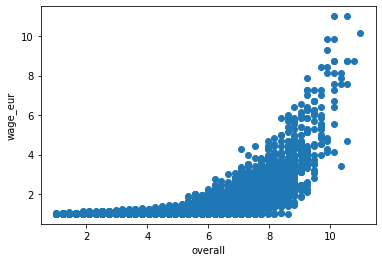

In [34]:
#Scatter the data ,to understand the reltionship between the selected columns
plt.scatter(new_data.overall, new_data.wage_eur) # I used two columns overall and potential
plt.xlabel("overall")
plt.ylabel("wage_eur")

plt.show

**Q5**

In [35]:
#An array to store the distance values  
sum_of_sqrt_dist={}

#For loop for clusers from 2cluser  to 10clusters

for k in range(2,11):
    #Kmean Object
    km = KMeans(n_clusters = k, n_init = 1, random_state=1)
    #Learning the data from the columns overall and potentialv(Based on the graph) 
    km.fit_predict(new_data[['overall','wage_eur']]) 
    sum_of_sqrt_dist[k]= km.inertia_ 

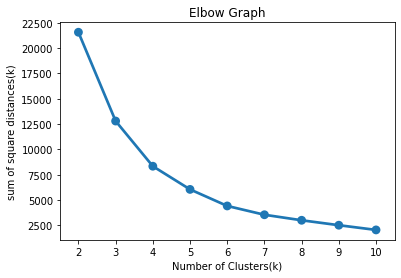

In [36]:
sns.pointplot(x=list(sum_of_sqrt_dist.keys()), y=list(sum_of_sqrt_dist.values()))

plt.xlabel("Number of Clusters(k)")

plt.ylabel("sum of square distances(k)")

plt.title("Elbow Graph")

plt.show()


**From this graph, I think the converge occcuers when the number of the clusters is 3.**

In [37]:
#The coordinates of the centroids
centroid = km.cluster_centers_
centroid

array([[8.49602333, 3.43858823],
       [4.70305976, 1.05605264],
       [6.80215195, 1.49616118],
       [3.01262638, 1.02079613],
       [6.04550734, 1.22899954],
       [3.98340047, 1.03423512],
       [1.92705492, 1.01303215],
       [9.5951087 , 6.69563662],
       [7.65072889, 2.01780368],
       [5.34307366, 1.10634394]])

**Q6**

In [38]:
#4 clusters
kmeans = KMeans(n_clusters = 3,random_state=1)

kmeans.fit(new_data)

y_kmeans = kmeans.predict(new_data)

label = kmeans.labels_

Text(0, 0.5, 'wage_eur')

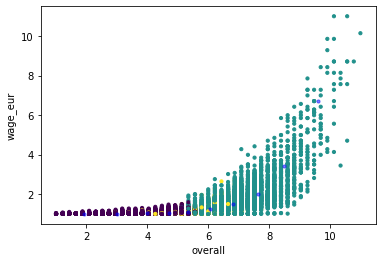

In [39]:
#Plotting
plt.scatter(new_data[["overall"]],new_data[["wage_eur"]], c=label,s=10)
plt.scatter(x=centroid[:,0], y=centroid[:,1],color='blue', s=10 , alpha= 0.5)
plt.xlabel("overall")
plt.ylabel("wage_eur")
